# Модель сверточной нейронной сети

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # Сворачиваем до одномерного
model.add(layers.Dense(64, activation='relu')) # Добавляем полносвязный слой
model.add(layers.Dense(10, activation='softmax')) # Добавляем softmax с 10 выходами (т.к. 10 классов)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

# Чтение данных, разбиение на тестовую и обучающую выборки

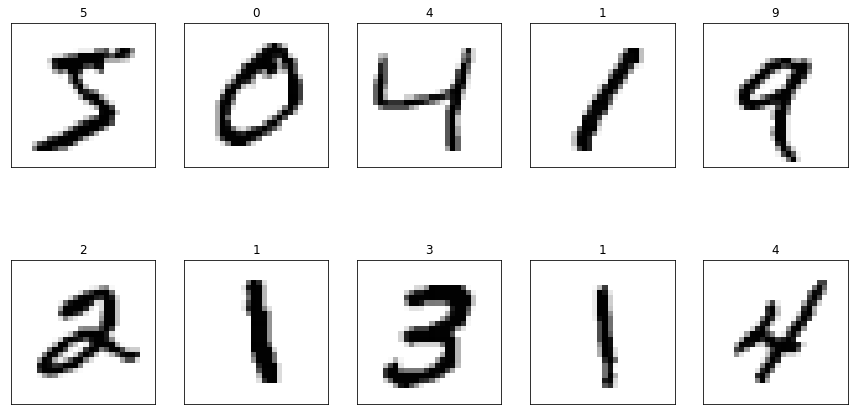

In [35]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import matplotlib.pyplot as plt

fix,axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})
for target, image, ax in zip(train_labels[:10], train_images[:10], axes.ravel()):
    ax.imshow(image, cmap=plt.cm.binary)
    ax.set_title(target)

# Подготовка данных

In [36]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Обучение сети

In [50]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 41s 678us/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0612 - val_accuracy: 0.9888
Epoch 2/5
60000/60000 [==============================] - 46s 763us/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0399 - val_accuracy: 0.9922
Epoch 3/5
60000/60000 [==============================] - 40s 664us/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0441 - val_accuracy: 0.9937
Epoch 4/5
60000/60000 [==============================] - 47s 787us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0425 - val_accuracy: 0.9929
Epoch 5/5
60000/60000 [==============================] - 47s 787us/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0554 - val_accuracy: 0.9909


# Визуализация результатов

Точность на обучающей выборке: 99.87%
Точность на тестовой выборке: 99.09%


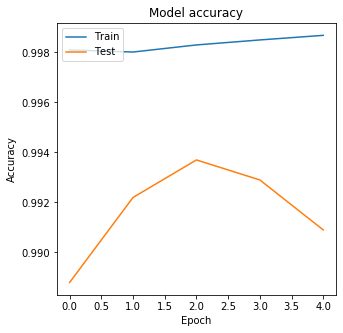

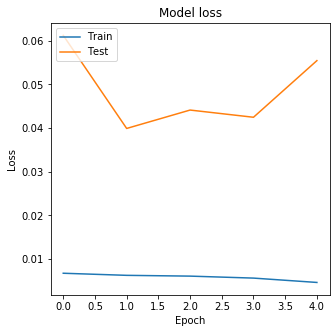

In [52]:
import matplotlib.pyplot as plt

train_acc = model.evaluate(train_images, train_labels, verbose=0)[1]
test_acc = model.evaluate(test_images, test_labels, verbose=0)[1]
print("Точность на обучающей выборке: {:.2f}%".format(train_acc*100))
print("Точность на тестовой выборке: {:.2f}%".format(test_acc*100))

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')